<a href="https://colab.research.google.com/github/MatthewBabajide/Hamoye_Test/blob/master/Test_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#writing import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


#load csv file
grid_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")

#view first 5 rows of the dataframe
grid_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [2]:
#exploring the dataset
grid_data.describe(include = "all")

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [3]:
grid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


### From the above, we can observe that

* There are no missing values
* All columns contain floats except "stabf" with contain categorial values
* "stabf" is a binary classifier with "unstable" occuring 6380 times and "stable" 3620 times
* there's imbalance in our target variable


In [4]:
#We will assign our features and target object
X = grid_data.drop(["stab", "stabf"], axis = 1)
y = grid_data.stabf

In [5]:
#split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [50]:
#Scaling our variables
from sklearn.preprocessing import StandardScaler

#instantiate the StandardScaler
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(X_train, y_train)
scaled_train_X = pd.DataFrame(scaled_train_X, columns = X_train.columns)

scaled_test_X = scaler.transform(X_test)
scaled_test_X = pd.DataFrame(scaled_test_X, columns = X_test.columns)

#scaled_train_X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.551314,0.007408,-1.177640,1.016898,-0.397177,0.759820,-0.636951,0.572703,-1.209413,0.313976,-1.625728,-0.637401
7996,1.015925,-0.223483,-1.489381,-1.479078,0.451468,-0.731994,0.990355,-1.048148,-1.094647,-0.755209,0.734821,-0.304433
7997,0.657609,-0.722756,-1.405888,-0.274301,-0.012584,1.438694,-0.364266,-1.046683,1.253539,0.293100,-1.550587,0.810344
7998,-0.059316,-1.260532,-1.010471,-0.877808,-0.779769,0.828824,0.516923,0.018984,-0.182448,-0.388255,-0.726781,1.667916


### Using Random Forest Model

In [7]:
#instantiate our model
rf_model = RandomForestClassifier(random_state = 1)

#fit our training variables
rf_model.fit(scaled_train_X, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [8]:
#Generate predictions using our Random Forest Model
predictions = rf_model.predict(scaled_test_X)
predictions

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

In [52]:
#import metrics for evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix

#The Confusion Matrix for our Random Forest Model
cof_matr = confusion_matrix(y_test, predictions)
cof_matr

array([[1233,   55],
       [  87,  625]])

In [54]:
#Measuring performance of our model
print (classification_report(y_test, predictions, digits = 4))


              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



### Using Extra Trees Classifier

In [11]:
#Create an instance of our Extra Tree Classifier and set the random state to 1
XtraT_clf = ExtraTreesClassifier(random_state = 1)

#fit our Extra Tree Model
XtraT_clf.fit(scaled_train_X, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [12]:
#Making predictions based on our model
XtraT_predict = XtraT_clf.predict(scaled_test_X)

In [57]:
#displaying the confusion matrix and evaluation metrics for our Extra Tree Model
print (confusion_matrix(y_test, XtraT_predict))
print (classification_report(y_test, XtraT_predict, digits = 4))

[[ 606  106]
 [  38 1250]]
              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



### using XGBOOST

In [14]:
#Import Extreme Gradient Boost
import xgboost as xgb

In [15]:
#Create an instance of the Extreme Gradient Boost Classifier
xgb_model = xgb.XGBClassifier(random_state = 1)

#fit xgb model
xgb_model.fit(scaled_train_X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
#Predict using our xgb model
xgb_predict = xgb_model.predict(scaled_test_X)

#display evaluation metrics of our xgb model
print (classification_report(y_test, xgb_predict, digits = 4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



### Using Light GBM


In [17]:
#Import Light GBM
import lightgbm as lgbm

In [18]:
#Create an instance of our model, fit and then make predictions using the model
lgb_model = lgbm.LGBMClassifier(random_state = 1)

lgb_model.fit(scaled_train_X, y_train)

lgbm_predict = lgb_model.predict(scaled_test_X)

In [56]:
#Display the evaluation metrics for our lgbm model
print (classification_report(y_test, lgbm_predict, digits = 4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



### Performance Tuning with Hyper Parameters

In [20]:
#Defining the parameters for the Hyperparameter grid
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [33]:
#import Random Search Module
from sklearn.model_selection import RandomizedSearchCV

#create an instance and set random state to 1
rand_search = RandomizedSearchCV(estimator = XtraT_clf, param_distributions = hyperparameter_grid, random_state= 1)

#fit  our Random search model
search = rand_search.fit(scaled_train_X, y_train)

In [34]:
#Display the best parameters using Random Search
search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [35]:
#Display the best estimator
search.best_estimator_

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=8, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [36]:
#getting our most important features
feature_importance = search.best_estimator_.feature_importances_
print ("Feature Importances: \n", feature_importance)

Feature Importances: 
 [0.13723975 0.1405075  0.13468029 0.13541676 0.00368342 0.00533686
 0.00542927 0.00496249 0.10256244 0.10757765 0.11306268 0.10954089]


In [38]:
#matching our best features to the column names and sorting in desending order
sorted(zip(feature_importance, X.columns), reverse= True)

[(0.14050750384993677, 'tau2'),
 (0.13723974766109256, 'tau1'),
 (0.1354167630909727, 'tau4'),
 (0.13468028520386593, 'tau3'),
 (0.11306267999167334, 'g3'),
 (0.10954089174337298, 'g4'),
 (0.10757764577478764, 'g2'),
 (0.10256244080927947, 'g1'),
 (0.005429268421191957, 'p3'),
 (0.005336864710946151, 'p2'),
 (0.004962486591192238, 'p4'),
 (0.003683422151688322, 'p1')]

### Using the best parameters in our Extra Trees Classifier

In [39]:
new_tree = ExtraTreesClassifier(max_features = None, n_estimators= 1000, min_samples_leaf= 8, min_samples_split = 2)

new_tree.fit(scaled_train_X, y_train)

new_tree_predict = new_tree.predict(scaled_test_X)

In [59]:
print (classification_report(y_test, new_tree_predict, digits = 4))

              precision    recall  f1-score   support

      stable     0.9214    0.8722    0.8961       712
    unstable     0.9314    0.9589    0.9449      1288

    accuracy                         0.9280      2000
   macro avg     0.9264    0.9155    0.9205      2000
weighted avg     0.9278    0.9280    0.9275      2000



In [49]:
new_conf_matrix = confusion_matrix(y_test, new_tree_predict)
new_conf_matrix

array([[ 621,   91],
       [  53, 1235]])

In [41]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [42]:
new_Tree_prob = new_tree.predict_proba(scaled_test_X)
new_Tree_prob

array([[0.06178383, 0.93821617],
       [0.06116141, 0.93883859],
       [0.7831002 , 0.2168998 ],
       ...,
       [0.77289752, 0.22710248],
       [0.42329042, 0.57670958],
       [0.18293181, 0.81706819]])

In [43]:
new_Tree_prob = new_Tree_prob[:, 1]
new_Tree_prob

array([0.93821617, 0.93883859, 0.2168998 , ..., 0.22710248, 0.57670958,
       0.81706819])

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, new_Tree_prob)
print ('AUC: %.2f'  % auc)

AUC: 0.98


In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_test_coded = encoder.fit_transform(y_test)

In [46]:
fpr, tpr, thresholds = roc_curve(y_test_coded, new_Tree_prob)

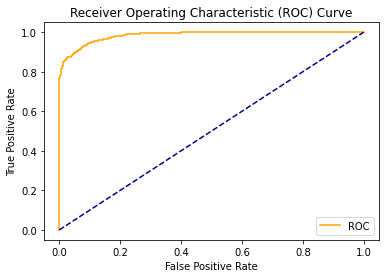

In [47]:
plot_roc_curve(fpr, tpr)